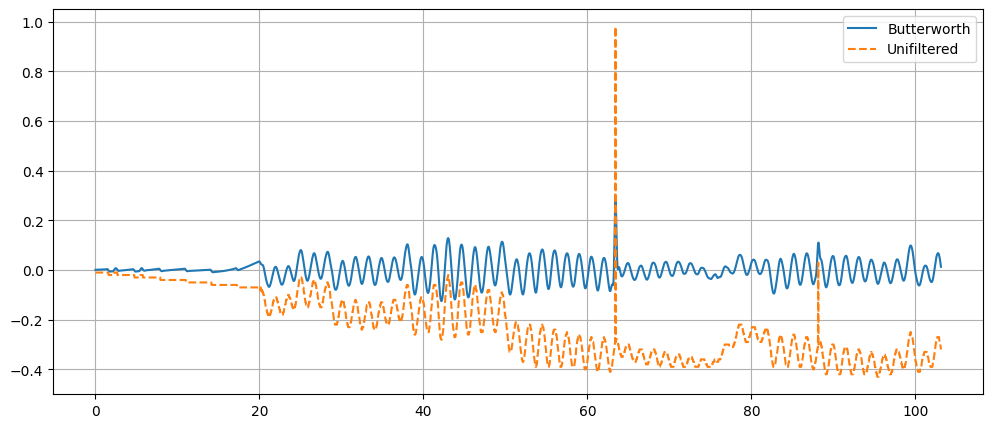

In [9]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt


def bandPass(order, highStop, lowStop, sampleRate, data):
    '''
    The function uses a Butterworth bandpass filter and returns the filtered data
    
    :param order: order of the filter, int
    :param highStop: high frequency before the roll off starts, int
    :param lowStop: low frequency before the roll off starts, int
    :param sampleRate: sample rate at which the data was collected, int
    :param data: collected data, array_like
    '''
    b, a = butter(3, [0.1,2.5], 'bandpass', fs=25)
    return filtfilt(b, a, data)


def load_accelerometer_data(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    ms = data[:, 1]
    y = data[:, 2]
    p = data[:, 3]
    r = data[:, 4]
    return ms, y, p, r


file_path = "/home/coder/workspace/Data/Prototype_2_Data/AutoP2_Data1.csv"
ms, y, p, r = load_accelerometer_data(file_path)

# Define parameters for the bandpass butterworth filter
order = 3 # Roll off of 18 dB per octave
highStop = 0.1 # Hz
lowStop = 2.5 # Hz
sampleRate = 25

# Call filter function on our data
yfilt = bandPass(order,highStop,lowStop,sampleRate,y)
pfilt = bandPass(order,highStop,lowStop,sampleRate,p)
rfilt = bandPass(order,highStop,lowStop,sampleRate,r)
msfilt = bandPass(order,highStop,lowStop,sampleRate,ms)

# Create time vector
t = np.linspace(0,len(y)/fs,len(y))

# Plotting
plt.figure(figsize=(12, 5))
plt.grid()
plt.plot(t,rfilt)
plt.plot(t,r, '--')
plt.legend(['Butterworth','Unifiltered'])
